In [1]:
import numpy as np  
import scipy.optimize as sp    
import matplotlib.pyplot as plt 

Problem 1

In [2]:
# Define the function g(x)
def g(x):
    return 0.1 * x**4 - 0.2 * x**3 + 4 * x + 6

# Define the function f(x) = -g(x) * log(g(x))
def f(x):
    return -(g(x)) * np.log(g(x))

def gradf(x):
    return - (1/5) * (2 * x**3 - 3 *x **2 + 20) * (np.log(g(x) + 1))

def grad2f(x):
    return -(1/5) * (6 * x**2 - 6 * x) * (np.log(g(x) + 1)) - (1/5) * ((0.4 * x**3 - 0.6 * x**2 + 4) * (2 * x**3 - 3 * x**2 + 20)) / (g(x))


In [3]:
import scipy.optimize as sp
x0 = 0
root = sp.newton(gradf, x0, grad2f)
print(root, f(root))

-1.7532418373500538 -0.009782451630649499


In [4]:
def newton(g,gradg,x0,tol,alpha,beta):
    # set initial x value
    x = x0
    
    # set tolerance so we don't skip the while loop
    mag = tol + 1
    
    counter = 0
    
    x_pass = [0] # store x values for plotting
    
    # while loop
    while mag > tol:
        
        # evaluate gradient
        gradf = np.array([g(x)])
        
        # evaluate hessian
        grad2f = np.array([[gradg(x)]])

        # choose a descent direction (ex: the negative gradient)
        deltax = -np.linalg.solve(grad2f, gradf)

        # choose a stepsize (exact search method)
        newX = lambda t: x + t*deltax # new point as a function of t
        dfdt = lambda t: gradf(newX(t)) @ deltax # gradient of f wrt t
        
        stepsize = 1

        while f(x+stepsize*deltax) > f(x) + alpha * stepsize * deltax @ deltax:
            stepsize = stepsize*beta

        x = x + stepsize*deltax
        x_pass.append(x)
        
        # check stopping criterion
        mag = gradf @ -deltax
        
        counter += 1
        
    return x, f(x), counter, x_pass

x0 = 0
newton(gradf, grad2f, x0, 1e-6, 0.4, 0.49)

(array([-2.91886522]), array([-12.33010548]), 1, [0, array([-2.91886522])])

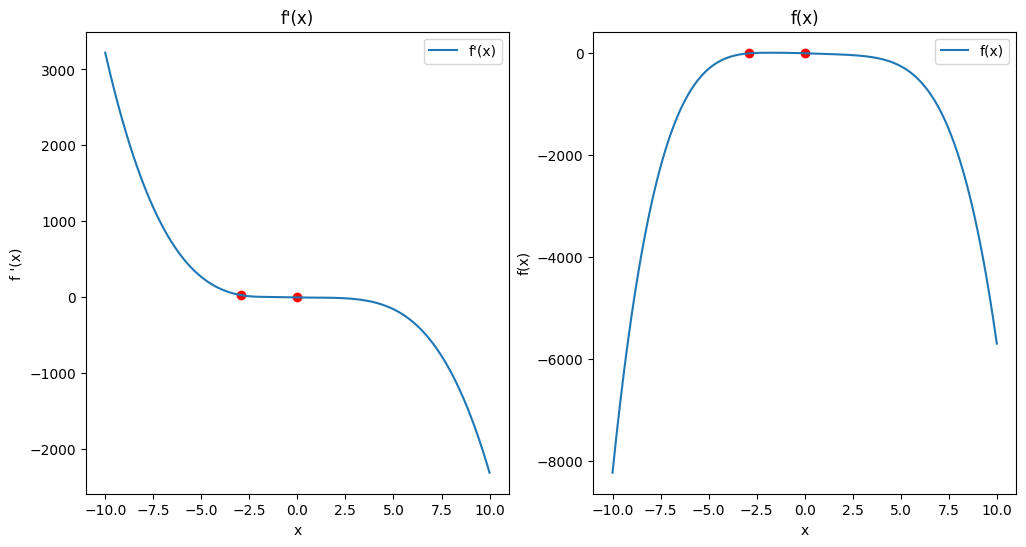

In [5]:
result_x, result_f, iterations, x_pass = newton(gradf, grad2f, x0, 1e-6, 0.4, 0.49)

# Plotting
x_values = np.linspace(-10, 10, 400)
plt.figure(figsize=(12, 6))

# Plot f(x)
plt.subplot(1, 2, 2)
plt.plot(x_values, f(x_values), label='f(x)')
plt.scatter(0, f(0), color = "red")
plt.scatter(result_x, f(result_x), color = "red")
plt.title('f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Plot f'(x)
plt.subplot(1, 2, 1)
plt.plot(x_values, gradf(x_values), label="f'(x)")
plt.scatter(0, gradf(0), color = "red")
plt.scatter(result_x, gradf(result_x), color='red')
plt.title("f'(x)")
plt.xlabel('x')
plt.ylabel("f '(x)")
plt.legend()
plt.show()

Problem 2

In [6]:
def f(k):
    a, b, x0 = -3, 2, 1
    return -(x0**2 * (1 + k**2)) / (2 * (a + k*b))

def gradf(k):
    a, b, x0 = -3, 2, 1
    return 2*b*x0**2*(k**2 + 1)/(2*a + 2*b*k)**2 - 2*k*x0**2/(2*a + 2*b*k)

def grad2f(k):
    a, b, x0 = -3, 2, 1
    return -8*b**2*x0**2*(k**2 + 1)/(2*a + 2*b*k)**3 + 8*b*k*x0**2/(2*a + 2*b*k)**2 - 2*x0**2/(2*a + 2*b*k)


def newton(g, gradg, x0, tol, alpha, beta):
    x = x0
    mag = tol + 1
    counter = 0

    while mag > tol:
        gradf = np.array([g(x)])
        grad2f = np.array([[gradg(x)]])
        deltax = -np.linalg.solve(grad2f, gradf) 

        newX = lambda t: x + t * deltax
        dfdt = lambda t: g(newX(t)) * deltax
        
        stepsize = 1
        while f(x + stepsize * deltax) > f(x) + alpha * stepsize * deltax @ deltax:
            stepsize *= beta

        x = x + stepsize * deltax
        mag = np.dot(gradf, -deltax)
        counter += 1

    return [x, f(x), counter]

newton(gradf, grad2f, 1, 1e-6, 0.4, 0.49)

[array([[[[[[[-0.30277561]]]]]]]), array([[[[[[[0.15138782]]]]]]]), 7]

Problem 3

In [7]:
summer_release = np.array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])
runtime = np.array([101, 114, 111, 100, 86, 109, 118, 103, 114, 118, 105, 135, 120, 156, 127])
tomatometer = np.array([90, 81, 44, 97, 58, 81, 52, 47, 43, 88, 100, 97, 91, 85, 89])
box_office_100M = np.array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

# Standardizing the features manually
runtime_std = (runtime - np.mean(runtime)) / np.std(runtime)
tomatometer_std = (tomatometer - np.mean(tomatometer)) / np.std(tomatometer)

# Combining the features into a single array
X_actual = np.column_stack((summer_release, runtime_std, tomatometer_std))
y_actual = box_office_100M

# Logistic function definition
def logistic_function(x, a, b):
    return 1 / (1 + np.exp(-(np.dot(x, a) + b)))

# Defining the gradient and Hessian functions as provided earlier
def logistic_gradient(params, x, y):
    a = params[:-1]
    b = params[-1]
    probabilities = logistic_function(x, a, b)
    grad_a = np.dot(x.T, (probabilities - y))
    grad_b = np.sum(probabilities - y)
    return np.append(grad_a, grad_b)

def logistic_hessian(params, x):
    a = params[:-1]
    b = params[-1]
    probabilities = logistic_function(x, a, b)
    S = np.diag(probabilities * (1 - probabilities))
    hessian_a = np.dot(x.T, np.dot(S, x))
    hessian_ab = np.dot(S, x).sum(axis=0)
    hessian_b = np.sum(S)
    hessian = np.zeros((len(params), len(params)))
    hessian[:-1, :-1] = hessian_a
    hessian[:-1, -1] = hessian_ab
    hessian[-1, :-1] = hessian_ab
    hessian[-1, -1] = hessian_b
    return hessian

# Log-likelihood function for logistic regression
def log_likelihood(params, x, y):
    a = params[:-1]
    b = params[-1]
    probabilities = logistic_function(x, a, b)
    ll = np.sum(y * np.log(probabilities) + (1 - y) * np.log(1 - probabilities))
    return -ll  # Negative log-likelihood for minimization


# Newton's Method
def newtonsMethod(f, df, d2f, x, tol, alpha, beta):
    i = 0
    decrement = tol + 1
    
    while decrement > tol:
        hess = d2f(x)
        grad = df(x)
        
        descentDir = np.linalg.solve(-hess, grad)
        stepsize = 1
        
        while f(x + stepsize * descentDir) > f(x) + alpha * stepsize * np.dot(grad, descentDir):
            stepsize = beta * stepsize
            
        x = x + stepsize * descentDir
        i = i + 1
        decrement = np.dot(grad, -descentDir)
        
    return [x, i]


# Applying Newton's Method to the movie dataset
neg_log_likelihood = lambda params: log_likelihood(params, X_actual, y_actual)
gradient = lambda params: logistic_gradient(params, X_actual, y_actual)
hessian = lambda params: logistic_hessian(params, X_actual)

newtonsMethod(neg_log_likelihood, gradient, hessian, np.zeros(X_actual.shape[1] + 1), 1e-6, 0.01, 0.8)


[array([ 0.70174023,  0.27437069,  0.88545797, -0.45088709]), 4]

Problem 4

C:\Users\xinyi\AppData\Local\Temp\ipykernel_1716\660004495.py:27: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(1 - A @ x)) - np.sum(np.log(1 - x**2))


[-204.65467168  -84.67681559  -76.51444136  -70.96851845]
[3.063509817230002, 193.6462345986405, 0.5913549652602592, 0.5216394535656516, 0.4752834560507945, 0.4414033586596754, 0.4151619461660674, 0.3940156533265673, 0.37647546647890184, 0.3616015648211566, 0.34876657580082454, 0.3375330903332367, 0.32758534580123944, 0.3186888007543549, 0.310665041600838, 0.3033755774057504, 0.29671101987070053, 0.2905836502105609, 0.2849221854003476, 0.2796680128272543, 0.27477242944624525, 0.2701945830171775, 0.2658999135285195, 0.2618589571348251, 0.25804641692334473, 0.2544404328538185, 0.2510220022809211, 0.2477745156610378, 0.24468338131698555, 0.24173571974492467, 0.2389201127234427, 0.23622639597719328, 0.2336454867303769, 0.23116923941573658, 0.22879032426161217, 0.22650212458918445, 0.2242986495043761, 0.22217445932886978, 0.2201246016296276, 0.21814455611089964, 0.21623018695275983, 0.21437770143499085, 0.21258361388917746, 0.21084471418620487, 0.20915804009943106, 0.20752085299211628, 0.20

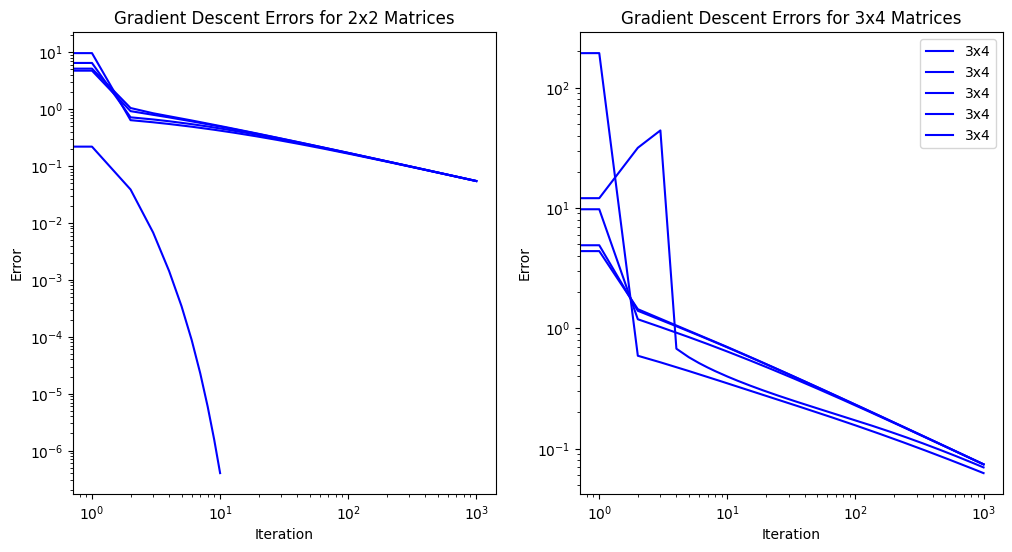

In [15]:
ALPHA = 0.2
BETA = 0.3
MAX = 1000
TOL = 1e-6

# Gradient Descent with Backtracking
def gradDescentBacktracking(f, df, x, tol=TOL, alpha=ALPHA, beta=BETA, max_iters=MAX):
    descentDir = tol + 1
    i = 0
    errors = []
    
    while np.linalg.norm(descentDir) > tol and i < max_iters:
        i += 1
        descentDir = -df(x)
        stepsize = 1

        while f(x + stepsize * descentDir) > f(x) + alpha * stepsize * np.dot(descentDir, descentDir):
            stepsize *= beta

        x = x + stepsize * descentDir
        errors.append(np.linalg.norm(descentDir))
    
    return x, errors, i

# Define the objective function and its gradient
def f(x, A):
    return -np.sum(np.log(1 - A @ x)) - np.sum(np.log(1 - x**2))

def df(x, A):
    return np.sum(A / (1 - A @ x)[:, np.newaxis], axis=0) + 2 * x / (1 - x**2)

# Solve for several instances and plot the results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# For 2x2 matrices
for _ in range(5):
    A = np.random.rand(2, 2)
    x0 = np.zeros(2)
    _, errors, _ = gradDescentBacktracking(lambda x: f(x, A), lambda x: df(x, A), x0)
    axs[0].loglog(errors, label='2x2', color = "blue")

# For 3x4 matrices
for _ in range(5):
    A = np.random.rand(3, 4)
    x0 = np.zeros(4)
    _, errors, _ = gradDescentBacktracking(lambda x: f(x, A), lambda x: df(x, A), x0)
    axs[1].loglog(errors, label='3x4', color = 'blue')
    
x, errors, i = gradDescentBacktracking(lambda x: f(x, A), lambda x: df(x, A), x0)
print(x)
print(errors)
print(i)

# Setting plot 
axs[0].set_title('Gradient Descent Errors for 2x2 Matrices')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error')

axs[1].set_title('Gradient Descent Errors for 3x4 Matrices')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Error')

plt.legend()
plt.show()

[-0.31546863 -0.35958343 -0.22025123 -0.45179001]
[0.9244561217495837, 0.2797427649468071, 0.05679260867120677, 0.01865426723853043, 0.005847819744830102, 0.001867121814015087, 0.0005931114675737622, 0.00018874327680670232]
8


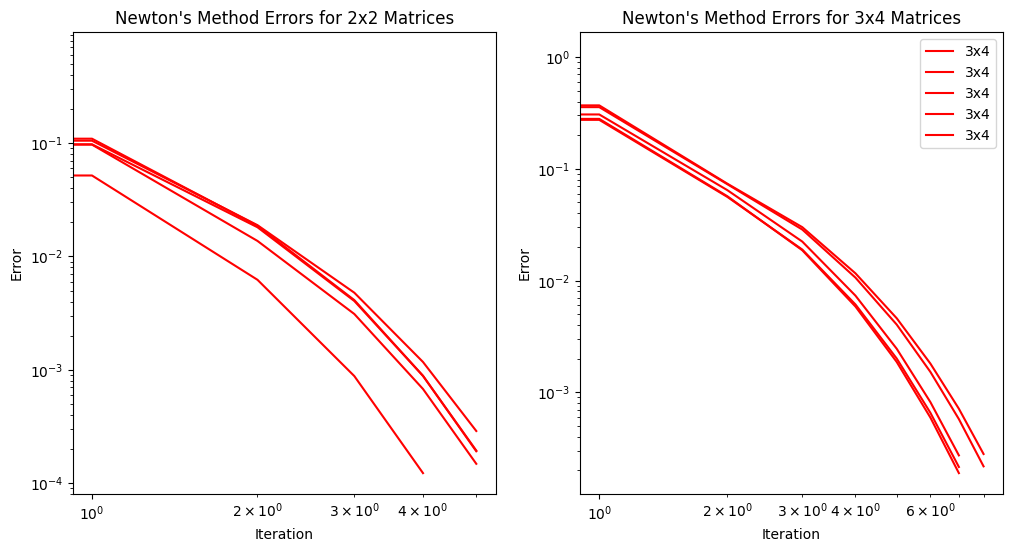

In [14]:
# Newton's Method
def newtonsMethod(f, df, d2f, x, tol=TOL, alpha=ALPHA, beta=BETA, max_iters=MAX):
    i = 0
    decrement = tol + 1
    errors = []

    while decrement > tol and i < max_iters:
        i += 1
        grad = df(x)
        hess = d2f(x)
        descentDir = np.linalg.solve(-hess, grad)

        stepsize = 1
        while f(x + stepsize * descentDir) > f(x) + alpha * stepsize * np.dot(descentDir, grad):
            stepsize *= beta

        x_new = x + stepsize * descentDir
        decrement = np.dot(grad, -descentDir)
        errors.append(np.linalg.norm(x_new - x))
        x = x_new

    return x, errors, i

# Hessian function
def d2f(x, A):
    Ax = A @ x
    temp = 1 / (1 - Ax)**2
    diag1 = np.sum((A**2).T * temp, axis=1)  # Adjusted broadcasting
    diag2 = 2 / (1 - x**2) + 2 * x**2 / (1 - x**2)**2
    return np.diag(diag1 + diag2)


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# For 2x2 matrices using Newton's Method
for _ in range(5):
    A = np.random.rand(2, 2)
    x0 = np.zeros(2)
    _, errors, _ = newtonsMethod(lambda x: f(x, A), lambda x: df(x, A), lambda x: d2f(x, A), x0)
    axs[0].loglog(errors, label='2x2', color='red')

# For 3x4 matrices using Newton's Method
for _ in range(5):
    A = np.random.rand(3, 4)
    x0 = np.zeros(4)
    _, errors, _ = newtonsMethod(lambda x: f(x, A), lambda x: df(x, A), lambda x: d2f(x, A), x0)
    axs[1].loglog(errors, label='3x4', color='red')
    
x, errors, i = newtonsMethod(lambda x: f(x, A), lambda x: df(x, A), lambda x: d2f(x, A), x0)
print(x)
print(errors)
print(i)

# Setting plot 
axs[0].set_title('Newton\'s Method Errors for 2x2 Matrices')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error')

axs[1].set_title('Newton\'s Method Errors for 3x4 Matrices')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Error')

plt.legend()
plt.show()

Problem 5

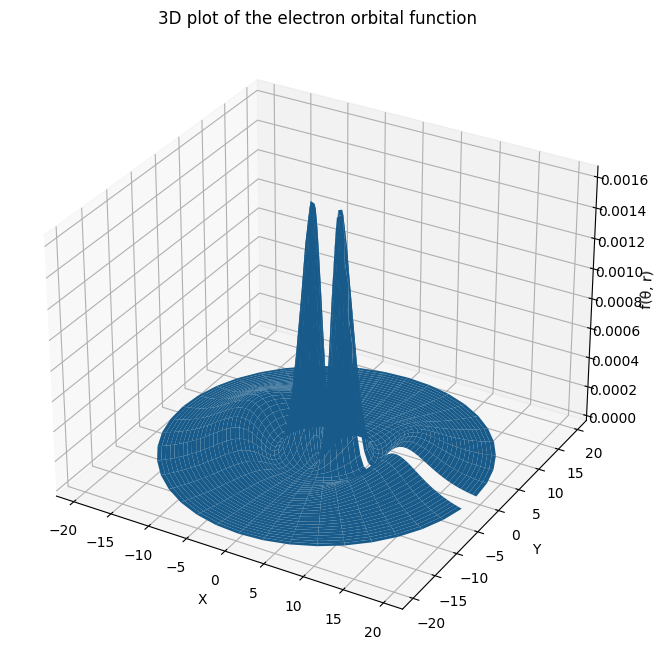

[(array([0.        , 1.75717486]), 0.0016714603709798183),
 (array([3.14268964, 1.75727771]), 0.0016714583769332826),
 (array([3.14049567, 1.75727765]), 0.0016714583769197587),
 (array([6.28318531, 1.75717489]), 0.001671460370986312)]

In [17]:
import scipy.optimize as sp

# Define the function f(θ, r)
def f(theta, r):
    return abs(np.sqrt(2) / (81 * np.sqrt(np.pi)) * (6 * r - r**2) * np.exp(-r / 3) * np.cos(theta))**2

# Create the grids for theta and r
theta = np.arange(0, 2 * np.pi, 0.05 * np.pi)
r = np.arange(0, 20, 0.5)
R, TH = np.meshgrid(r, theta)

# Evaluate the function
F = f(TH, R)

# Convert to cartesian coordinates for plotting
X = R * np.cos(TH)
Y = R * np.sin(TH)

# 3D plot
fig,ax = plt.subplots(subplot_kw= {"projection":"3d"}, figsize = (16, 8))
fig,ax.plot_surface(X, Y, F)
ax.set_title("3D plot of the electron orbital function")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(θ, r)')
plt.show()

# Function for optimization (negative f for converting maximization to minimize)
def obj_f(x):
    return -f(x[0], x[1])

# Initial guesses for the optimization
initial_guesses = [(np.pi/4, 5), (3*np.pi/4, 5), (5*np.pi/4, 5), (7*np.pi/4, 5)]

# Find the local maxima
maxima = []
for guess in initial_guesses:
    result = sp.minimize(obj_f, guess, bounds=[(0, 2*np.pi), (0, 20)])
    if result.success:
        maxima.append((result.x, -result.fun))

maxima
